# Readmission Rate & Mortality Rate Analysis in Relation to Dialysis

In [138]:
# import libraries needed
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
import visuals as vs
import seaborn as sns

Data Exploration

In [139]:
# load original data into dataframe and check shape
df_orig = pd.read_csv("Dialysis_data.csv")
df_orig.shape

(7281, 105)

In [140]:
print('--Examine the data type--')
print(df_orig.info())
df_orig.describe()

--Examine the data type--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Columns: 105 entries, Provider Number to Percentage of pediatric HD patients with nPCR
dtypes: float64(55), int64(24), object(26)
memory usage: 5.8+ MB
None


,NETWORK,Five Star,Five Star Data Availability Code,Zip,Late Shift,# of Dialysis Stations,Offers in-center hemodialysis,Offers in-center peritoneal dialysis,Offers home hemodialysis training,Percentage of Medicare patients with Hgb<10 g/dL,...,Fistula Rate: Upper Confidence Limit (97.5%),Fistula Rate: Lower Confidence Limit (2.5%),Number of patients in long term catheter summary,Number of patient months in long term catheter summary,Long term catheter Data Availability Code,Percentage of Adult patients with long term catheter in use,Number of patients in nPCR summary,Number of patient-months in nPCR summary,nPCR Data Availability Code,Percentage of pediatric HD patients with nPCR
count,7281.000000,6105.000000,7281.000000,7281.000000,7281.000000,7281.000000,7281.000000,7281.000000,7281.000000,5798.000000,...,6092.000000,6092.000000,7109.000000,7109.000000,7281.000000,6092.000000,7109.000000,7109.000000,7281.000000,8.000000
mean,9.631781,3.684685,43.369180,50121.034611,0.162066,17.254361,0.942865,0.513116,0.281829,17.607623,...,84.370814,40.232764,81.197637,703.057814,39.820629,12.243762,0.144183,0.974961,255.579453,95.875000
std,4.703427,1.036997,96.565064,27553.166088,0.368536,8.458828,0.232116,0.499862,0.449922,12.471809,...,11.063831,14.952724,55.473142,506.624661,88.852792,7.079735,1.334323,9.579478,17.037565,3.270539
min,1.000000,1.000000,1.000000,603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,91.000000
25%,6.000000,3.000000,1.000000,29488.000000,0.000000,12.000000,1.000000,0.000000,0.000000,9.000000,...,78.000000,32.000000,41.000000,331.000000,1.000000,8.000000,0.000000,0.000000,259.000000,94.000000
50%,9.000000,4.000000,1.000000,45750.000000,0.000000,16.000000,1.000000,1.000000,0.000000,15.000000,...,85.000000,42.000000,74.000000,629.000000,1.000000,11.000000,0.000000,0.000000,259.000000,97.000000
75%,14.000000,5.000000,1.000000,75965.000000,0.000000,22.000000,1.000000,1.000000,1.000000,22.000000,...,92.000000,50.000000,113.000000,978.000000,1.000000,15.000000,0.000000,0.000000,259.000000,98.250000
max,18.000000,5.000000,270.000000,99801.000000,1.000000,80.000000,1.000000,1.000000,1.000000,94.000000,...,100.000000,95.000000,894.000000,4281.000000,270.000000,93.000000,42.000000,306.000000,270.000000,99.000000


In [141]:
df_orig.head()

,Provider Number,NETWORK,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City,State,...,Fistula Rate: Upper Confidence Limit (97.5%),Fistula Rate: Lower Confidence Limit (2.5%),Number of patients in long term catheter summary,Number of patient months in long term catheter summary,Long term catheter Data Availability Code,Percentage of Adult patients with long term catheter in use,Number of patients in nPCR summary,Number of patient-months in nPCR summary,nPCR Data Availability Code,Percentage of pediatric HD patients with nPCR
0,32597,15,SAN CARLOS DIALYSIS (FMC),01/01/2014-12/31/2017,5.0,1,US 70 & AZ ROUTE 170,NaN,PERIDOT,AZ,...,93.0,59.0,74.0,731.0,1,11.0,0.0,0.0,259,NaN
1,42574,13,NORTH HILLS DIALYSIS,01/01/2014-12/31/2017,4.0,1,107 E MONTE PAINTER DR,NaN,FAYETTEVILLE,AR,...,80.0,46.0,145.0,1319.0,1,13.0,0.0,0.0,259,NaN
2,22507,16,FMC COOK INLET,01/01/2014-12/31/2017,4.0,1,9085 BLACKBERRY ST,NaN,ANCHORAGE,AK,...,100.0,38.0,29.0,228.0,1,12.0,0.0,0.0,259,NaN
3,12640,8,PICKENS COUNTY DIALYSIS,01/01/2014-12/31/2017,3.0,1,289 WILLIAM E HILL DRIVE,SUITE A,CARROLLTON,AL,...,68.0,23.0,63.0,583.0,1,10.0,0.0,0.0,259,NaN
4,12664,8,"BIO-MEDICAL APPLICATIONS OF ALABAMA, INC.",01/01/2014-12/31/2017,4.0,1,12401 SKOPELOS RD,NaN,GRAND BAY,AL,...,69.0,21.0,84.0,728.0,1,7.0,0.0,0.0,259,NaN


In [142]:
# Get column names
df_columns = list(df_orig)
df_columns

['Provider Number',
 'NETWORK',
 'Facility Name',
 'Five Star Date',
 'Five Star',
 'Five Star Data Availability Code',
 'Address Line 1',
 'Address Line 2',
 'City',
 'State',
 'Zip',
 'County',
 'Phone Number',
 'Profit or Non-Profit',
 'Chain Owned',
 'Chain Organization',
 'Late Shift',
 '# of Dialysis Stations',
 'Offers in-center hemodialysis',
 'Offers in-center peritoneal dialysis',
 'Offers home hemodialysis training',
 'Certification or Recertification Date',
 'Claims Date',
 'CROWNWeb Date',
 'STrR Date',
 'Percentage of Medicare patients with Hgb<10 g/dL',
 'HGB<10 data availability code',
 'Percentage of Medicare patients with Hgb>12 g/dL',
 'Hgb > 12 data availability code',
 'Number of Dialysis Patients with Hgb data',
 'Patient Transfusion data availability Code',
 'Patient Transfusion category text',
 'Number of patients included in the transfusion summary',
 'Percent of Adult HD patients with Kt/V >= 1.2',
 'Adult HD Kt/V data availability code',
 'Percentage of Adult

In [143]:
df_orig.copy(deep=True)

,Provider Number,NETWORK,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City,State,...,Fistula Rate: Upper Confidence Limit (97.5%),Fistula Rate: Lower Confidence Limit (2.5%),Number of patients in long term catheter summary,Number of patient months in long term catheter summary,Long term catheter Data Availability Code,Percentage of Adult patients with long term catheter in use,Number of patients in nPCR summary,Number of patient-months in nPCR summary,nPCR Data Availability Code,Percentage of pediatric HD patients with nPCR
0,32597,15,SAN CARLOS DIALYSIS (FMC),01/01/2014-12/31/2017,5.0,1,US 70 & AZ ROUTE 170,NaN,PERIDOT,AZ,...,93.0,59.0,74.0,731.0,1,11.0,0.0,0.0,259,NaN
1,42574,13,NORTH HILLS DIALYSIS,01/01/2014-12/31/2017,4.0,1,107 E MONTE PAINTER DR,NaN,FAYETTEVILLE,AR,...,80.0,46.0,145.0,1319.0,1,13.0,0.0,0.0,259,NaN
2,22507,16,FMC COOK INLET,01/01/2014-12/31/2017,4.0,1,9085 BLACKBERRY ST,NaN,ANCHORAGE,AK,...,100.0,38.0,29.0,228.0,1,12.0,0.0,0.0,259,NaN
3,12640,8,PICKENS COUNTY DIALYSIS,01/01/2014-12/31/2017,3.0,1,289 WILLIAM E HILL DRIVE,SUITE A,CARROLLTON,AL,...,68.0,23.0,63.0,583.0,1,10.0,0.0,0.0,259,NaN
4,12664,8,"BIO-MEDICAL APPLICATIONS OF ALABAMA, INC.",01/01/2014-12/31/2017,4.0,1,12401 SKOPELOS RD,NaN,GRAND BAY,AL,...,69.0,21.0,84.0,728.0,1,7.0,0.0,0.0,259,NaN
5,32611,15,SOUTHWEST KIDNEY DIALYSIS - PHOENIX (DVA),01/01/2014-12/31/2017,5.0,1,337 E CORONADO RD STE 101,NaN,PHOENIX,AZ,...,88.0,64.0,166.0,1541.0,1,10.0,0.0,0.0,259,NaN
6,22506,16,LIBERTY DIALYSIS - ALASKA LLC,01/01/2014-12/31/2017,5.0,1,901 EAST DIMOND BOULEVARD SUITE G,NaN,ANCHORAGE,AK,...,88.0,53.0,117.0,1000.0,1,12.0,0.0,0.0,201,NaN
7,12633,8,FMC PRATTVILLE,01/01/2014-12/31/2017,3.0,1,692 COVERED BRIDGE PARKWAY,NaN,PRATTVILLE,AL,...,68.0,24.0,81.0,725.0,1,15.0,0.0,0.0,259,NaN
8,12621,8,RAI-SNOW ST-OXFORD,01/01/2014-12/31/2017,2.0,1,711 SNOW STREET,NaN,OXFORD,AL,...,74.0,29.0,92.0,738.0,1,15.0,0.0,0.0,259,NaN
9,12513,8,FMC LANGDALE,01/01/2014-12/31/2017,NaN,270,8 MEDICAL PARK,NaN,VALLEY,AL,...,NaN,NaN,81.0,758.0,270,NaN,0.0,0.0,270,NaN


Important Features related to Dialysis imported to a new dataframe

In [144]:
new_data = df_orig[['# of Dialysis Stations',
 'Offers in-center hemodialysis',
 'Offers in-center peritoneal dialysis',
 'Offers home hemodialysis training',
 'Percentage of Medicare patients with Hgb<10 g/dL',
 'Percentage of Medicare patients with Hgb>12 g/dL',
 'Number of Dialysis Patients with Hgb data',
 'Percent of Adult HD patients with Kt/V >= 1.2',
 #'Percentage of Adult PD PTS with Kt/V >= 1.7',
 #'Percentage of Pediatric HD patients with Kt/V >= 1.2',
 'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)',
 'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL',
 'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL',
 'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL',
 'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL',
 'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL',
 'Percentage of pediatric PD patients with Kt/V>=1.8',
 'Fistula Rate (Facility)',
 'Percentage of Adult patients with long term catheter in use',
 #'Percentage of pediatric HD patients with nPCR', 
  'Readmission Rate (Facility)',
    'Mortality Rate (Facility)']]

new_data

,# of Dialysis Stations,Offers in-center hemodialysis,Offers in-center peritoneal dialysis,Offers home hemodialysis training,Percentage of Medicare patients with Hgb<10 g/dL,Percentage of Medicare patients with Hgb>12 g/dL,Number of Dialysis Patients with Hgb data,Percent of Adult HD patients with Kt/V >= 1.2,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Percentage of pediatric PD patients with Kt/V>=1.8,Fistula Rate (Facility),Percentage of Adult patients with long term catheter in use,Readmission Rate (Facility),Mortality Rate (Facility)
0,16,1,0,0,11.0,0.0,36.0,96.0,1.0,10.0,22.0,24.0,25.0,19.0,NaN,77.0,11.0,27.5,19.7
1,19,1,1,1,16.0,2.0,93.0,98.0,2.0,8.0,22.0,27.0,25.0,18.0,NaN,64.0,13.0,22.2,20.4
2,12,1,1,1,11.0,0.0,18.0,99.0,3.0,21.0,30.0,19.0,18.0,11.0,NaN,72.0,12.0,15.3,22.4
3,14,1,0,0,3.0,0.0,34.0,95.0,5.0,8.0,28.0,30.0,18.0,16.0,NaN,46.0,10.0,24.2,27.0
4,27,1,1,1,12.0,0.0,33.0,97.0,0.0,9.0,20.0,25.0,25.0,21.0,NaN,46.0,7.0,28.4,17.1
5,24,1,0,0,3.0,0.0,61.0,98.0,3.0,9.0,27.0,36.0,16.0,13.0,NaN,76.0,10.0,19.6,19.5
6,18,1,1,1,9.0,0.0,92.0,98.0,1.0,11.0,31.0,28.0,17.0,14.0,NaN,71.0,12.0,24.7,16.3
7,18,1,1,1,9.0,0.0,33.0,98.0,1.0,9.0,29.0,40.0,16.0,7.0,NaN,46.0,15.0,28.9,23.9
8,25,1,1,1,28.0,0.0,40.0,91.0,4.0,6.0,19.0,24.0,30.0,21.0,NaN,52.0,15.0,25.2,28.4
9,19,1,0,0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
new_data.mean()

# of Dialysis Stations                                                                     17.254361
Offers in-center hemodialysis                                                               0.942865
Offers in-center peritoneal dialysis                                                        0.513116
Offers home hemodialysis training                                                           0.281829
Percentage of Medicare patients with Hgb<10 g/dL                                           17.607623
Percentage of Medicare patients with Hgb>12 g/dL                                            0.222663
Number of Dialysis Patients with Hgb data                                                  38.805739
Percent of Adult HD patients with Kt/V >= 1.2                                              95.983205
Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)     2.448151
Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL                     

Filling NaN spaces with mean of the columns

In [146]:
df_latest=new_data.fillna(new_data.mean())
df_latest

,# of Dialysis Stations,Offers in-center hemodialysis,Offers in-center peritoneal dialysis,Offers home hemodialysis training,Percentage of Medicare patients with Hgb<10 g/dL,Percentage of Medicare patients with Hgb>12 g/dL,Number of Dialysis Patients with Hgb data,Percent of Adult HD patients with Kt/V >= 1.2,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Percentage of pediatric PD patients with Kt/V>=1.8,Fistula Rate (Facility),Percentage of Adult patients with long term catheter in use,Readmission Rate (Facility),Mortality Rate (Facility)
0,16,1,0,0,11.000000,0.000000,36.0,96.000000,1.000000,10.000000,22.000000,24.000000,25.000000,19.000000,71.354839,77.000000,11.000000,27.50000,19.700000
1,19,1,1,1,16.000000,2.000000,93.0,98.000000,2.000000,8.000000,22.000000,27.000000,25.000000,18.000000,71.354839,64.000000,13.000000,22.20000,20.400000
2,12,1,1,1,11.000000,0.000000,18.0,99.000000,3.000000,21.000000,30.000000,19.000000,18.000000,11.000000,71.354839,72.000000,12.000000,15.30000,22.400000
3,14,1,0,0,3.000000,0.000000,34.0,95.000000,5.000000,8.000000,28.000000,30.000000,18.000000,16.000000,71.354839,46.000000,10.000000,24.20000,27.000000
4,27,1,1,1,12.000000,0.000000,33.0,97.000000,0.000000,9.000000,20.000000,25.000000,25.000000,21.000000,71.354839,46.000000,7.000000,28.40000,17.100000
5,24,1,0,0,3.000000,0.000000,61.0,98.000000,3.000000,9.000000,27.000000,36.000000,16.000000,13.000000,71.354839,76.000000,10.000000,19.60000,19.500000
6,18,1,1,1,9.000000,0.000000,92.0,98.000000,1.000000,11.000000,31.000000,28.000000,17.000000,14.000000,71.354839,71.000000,12.000000,24.70000,16.300000
7,18,1,1,1,9.000000,0.000000,33.0,98.000000,1.000000,9.000000,29.000000,40.000000,16.000000,7.000000,71.354839,46.000000,15.000000,28.90000,23.900000
8,25,1,1,1,28.000000,0.000000,40.0,91.000000,4.000000,6.000000,19.000000,24.000000,30.000000,21.000000,71.354839,52.000000,15.000000,25.20000,28.400000
9,19,1,0,0,17.607623,0.222663,40.0,95.983205,2.448151,8.779017,25.765981,31.040836,21.357468,13.055599,71.354839,63.268549,12.243762,26.72686,21.716423


Spilting into bins and forming target and feature set

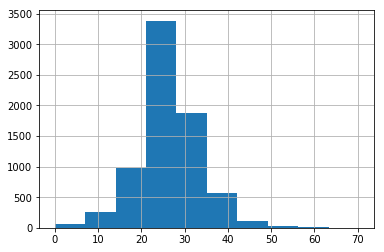

In [147]:
df_latest["Readmission Rate (Facility)"].hist()

In [148]:
#Defining the splits for Readmission Rates :  0-30% will be Safe-Zone, 30%-100% will be Danger-Zone.
bins = [0, 30, 50, 100]

#1 for Safe-zone, #2 for Danger-zone # High Risk zone
safetyzone_labels=[1, 2, 3]

df_latest['risk_zone'] = pd.cut(df_latest['Readmission Rate (Facility)'], bins=bins, labels=safetyzone_labels, include_lowest=True)

# Split the data into features and target label
target = df_latest['risk_zone']
features_desired = df_latest.drop(['risk_zone','Readmission Rate (Facility)',
                                   'Mortality Rate (Facility)',
                                   'Number of Dialysis Patients with Hgb data',
                                  '# of Dialysis Stations'], axis = 1)


df_latest.to_csv("C:/Users/jense/Desktop/ML-Final-Project/My work/df_latest.csv")
df_latest

,# of Dialysis Stations,Offers in-center hemodialysis,Offers in-center peritoneal dialysis,Offers home hemodialysis training,Percentage of Medicare patients with Hgb<10 g/dL,Percentage of Medicare patients with Hgb>12 g/dL,Number of Dialysis Patients with Hgb data,Percent of Adult HD patients with Kt/V >= 1.2,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Percentage of pediatric PD patients with Kt/V>=1.8,Fistula Rate (Facility),Percentage of Adult patients with long term catheter in use,Readmission Rate (Facility),Mortality Rate (Facility),risk_zone
0,16,1,0,0,11.000000,0.000000,36.0,96.000000,1.000000,10.000000,22.000000,24.000000,25.000000,19.000000,71.354839,77.000000,11.000000,27.50000,19.700000,1
1,19,1,1,1,16.000000,2.000000,93.0,98.000000,2.000000,8.000000,22.000000,27.000000,25.000000,18.000000,71.354839,64.000000,13.000000,22.20000,20.400000,1
2,12,1,1,1,11.000000,0.000000,18.0,99.000000,3.000000,21.000000,30.000000,19.000000,18.000000,11.000000,71.354839,72.000000,12.000000,15.30000,22.400000,1
3,14,1,0,0,3.000000,0.000000,34.0,95.000000,5.000000,8.000000,28.000000,30.000000,18.000000,16.000000,71.354839,46.000000,10.000000,24.20000,27.000000,1
4,27,1,1,1,12.000000,0.000000,33.0,97.000000,0.000000,9.000000,20.000000,25.000000,25.000000,21.000000,71.354839,46.000000,7.000000,28.40000,17.100000,1
5,24,1,0,0,3.000000,0.000000,61.0,98.000000,3.000000,9.000000,27.000000,36.000000,16.000000,13.000000,71.354839,76.000000,10.000000,19.60000,19.500000,1
6,18,1,1,1,9.000000,0.000000,92.0,98.000000,1.000000,11.000000,31.000000,28.000000,17.000000,14.000000,71.354839,71.000000,12.000000,24.70000,16.300000,1
7,18,1,1,1,9.000000,0.000000,33.0,98.000000,1.000000,9.000000,29.000000,40.000000,16.000000,7.000000,71.354839,46.000000,15.000000,28.90000,23.900000,1
8,25,1,1,1,28.000000,0.000000,40.0,91.000000,4.000000,6.000000,19.000000,24.000000,30.000000,21.000000,71.354839,52.000000,15.000000,25.20000,28.400000,1
9,19,1,0,0,17.607623,0.222663,40.0,95.983205,2.448151,8.779017,25.765981,31.040836,21.357468,13.055599,71.354839,63.268549,12.243762,26.72686,21.716423,1


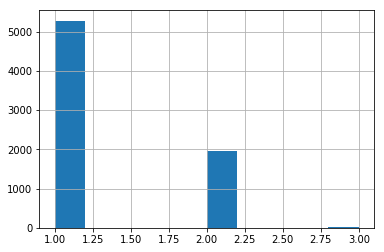

In [149]:
target.hist()

In [150]:
features_desired

,Offers in-center hemodialysis,Offers in-center peritoneal dialysis,Offers home hemodialysis training,Percentage of Medicare patients with Hgb<10 g/dL,Percentage of Medicare patients with Hgb>12 g/dL,Percent of Adult HD patients with Kt/V >= 1.2,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Percentage of pediatric PD patients with Kt/V>=1.8,Fistula Rate (Facility),Percentage of Adult patients with long term catheter in use
0,1,0,0,11.000000,0.000000,96.000000,1.000000,10.000000,22.000000,24.000000,25.000000,19.000000,71.354839,77.000000,11.000000
1,1,1,1,16.000000,2.000000,98.000000,2.000000,8.000000,22.000000,27.000000,25.000000,18.000000,71.354839,64.000000,13.000000
2,1,1,1,11.000000,0.000000,99.000000,3.000000,21.000000,30.000000,19.000000,18.000000,11.000000,71.354839,72.000000,12.000000
3,1,0,0,3.000000,0.000000,95.000000,5.000000,8.000000,28.000000,30.000000,18.000000,16.000000,71.354839,46.000000,10.000000
4,1,1,1,12.000000,0.000000,97.000000,0.000000,9.000000,20.000000,25.000000,25.000000,21.000000,71.354839,46.000000,7.000000
5,1,0,0,3.000000,0.000000,98.000000,3.000000,9.000000,27.000000,36.000000,16.000000,13.000000,71.354839,76.000000,10.000000
6,1,1,1,9.000000,0.000000,98.000000,1.000000,11.000000,31.000000,28.000000,17.000000,14.000000,71.354839,71.000000,12.000000
7,1,1,1,9.000000,0.000000,98.000000,1.000000,9.000000,29.000000,40.000000,16.000000,7.000000,71.354839,46.000000,15.000000
8,1,1,1,28.000000,0.000000,91.000000,4.000000,6.000000,19.000000,24.000000,30.000000,21.000000,71.354839,52.000000,15.000000
9,1,0,0,17.607623,0.222663,95.983205,2.448151,8.779017,25.765981,31.040836,21.357468,13.055599,71.354839,63.268549,12.243762


In [151]:
from sklearn import tree

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_desired, target,test_size = 0.2, random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
type(target)

Training set has 5824 samples.
Testing set has 1457 samples.


pandas.core.series.Series

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
clf_score=clf1.score(X_test, y_test)
clf_score

0.730267673301304

In [154]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
rf_score=rf.score(X_test, y_test)
rf_score

0.7268359643102265

In [155]:
sorted(zip(rf.feature_importances_, features_desired), reverse=True)

[(0.11063439113441761, 'Percentage of Medicare patients with Hgb<10 g/dL'),
 (0.10984202647402247, 'Fistula Rate (Facility)'),
 (0.09845060594954091,
  'Percentage of Adult patients with long term catheter in use'),
 (0.09574888874764734,
  'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL'),
 (0.09380131321847478,
  'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL'),
 (0.093557269658954,
  'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL'),
 (0.08960752887625874,
  'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL'),
 (0.08927474151600528,
  'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL'),
 (0.07786977306123853, 'Percent of Adult HD patients with Kt/V >= 1.2'),
 (0.06863453717449568,
  'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)'),
 (0.027135646600298532, 'Percentage of Medicare patients with Hgb>12 g/dL'),
 (0.020404

In [156]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(X_train.columns)
print(importances)

# Plot
# vs.feature_plot(importances, X_train, y_train)

Index(['Offers in-center hemodialysis', 'Offers in-center peritoneal dialysis',
       'Offers home hemodialysis training',
       'Percentage of Medicare patients with Hgb<10 g/dL',
       'Percentage of Medicare patients with Hgb>12 g/dL',
       'Percent of Adult HD patients with Kt/V >= 1.2',
       'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)',
       'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL',
       'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL',
       'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL',
       'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL',
       'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL',
       'Percentage of pediatric PD patients with Kt/V>=1.8',
       'Fistula Rate (Facility)',
       'Percentage of Adult patients with long term catheter in use'],
      dtype='object')
[0

In [161]:
columns_series = pd.Series(X_train.columns)
columns_series
importances_df = pd.DataFrame(importances)
importances_df["Features"] = columns_series
importances_df.sort_values(by = 0, ascending= False, inplace= True)
importances_df

,0,Features
3,0.110303,Percentage of Medicare patients with Hgb<10 g/dL
14,0.106640,Percentage of Adult patients with long term ca...
13,0.102772,Fistula Rate (Facility)
11,0.100634,Percentage of Adult patients with serum phosph...
10,0.096434,Percentage of Adult patients with serum phosph...
9,0.093405,Percentage of Adult patients with serum phosph...
8,0.088919,Percentage of Adult patients with serum phosph...
7,0.085383,Percentage of Adult patients with serum phosph...
5,0.073903,Percent of Adult HD patients with Kt/V >= 1.2
6,0.069338,Percentage of Adult patients with hypercalcemi...


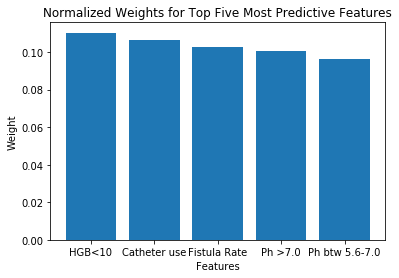

In [160]:
importances_x = [1,2,3,4,5]
importances_y = importances_df[0][0:5]
importances_labels = ["HGB<10", "Catheter use", "Fistula Rate" , "Ph >7.0", "Ph btw 5.6-7.0"]

plt.bar(importances_x, importances_y)
plt.xticks(importances_x, importances_labels)
plt.title("Normalized Weights for Top Five Most Predictive Features")
plt.ylabel('Weight')
plt.xlabel('Features')
plt.savefig("C:/Users/jense/Desktop/ML-Final-Project/My work/importances.png")
plt.show()


In [162]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
forest.score(X_test, y_test)
f_score=forest.score(X_test, y_test)
f_score

0.7240905971173645

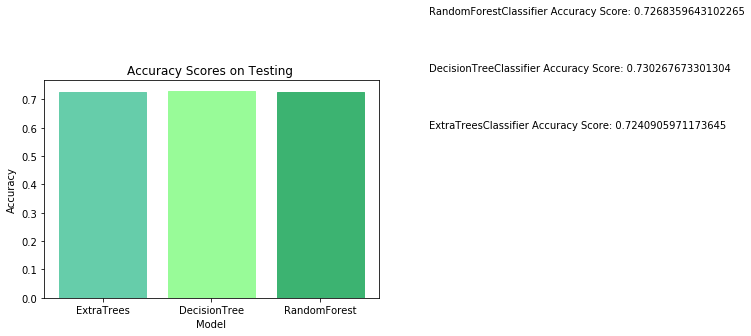

In [163]:
acc_test_x = [1,2,3]
acc_test_y = [f_score, clf1_score,rf_score]
acc_test_labels = ['ExtraTrees', 'DecisionTree', 'RandomForest']

acc_test_bar = plt.bar(acc_test_x, acc_test_y)
acc_test_bar[0].set_color("#66CDAA")
acc_test_bar[1].set_color("#98FB98")
acc_test_bar[2].set_color("#3CB371")
plt.xticks(acc_test_x, acc_test_labels)
plt.title("Accuracy Scores on Testing ")
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.text(4, 0.6, f"ExtraTreesClassifier Accuracy Score: {f_score}")
plt.text(4, 0.8, f"DecisionTreeClassifier Accuracy Score: {clf_score}")
plt.text(4, 1, f"RandomForestClassifier Accuracy Score: {rf_score}")
plt.savefig("C:/Users/jense/Desktop/ML-Final-Project/My work/accuracy_test.png")
plt.show()

C:\Users\jense\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jense\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


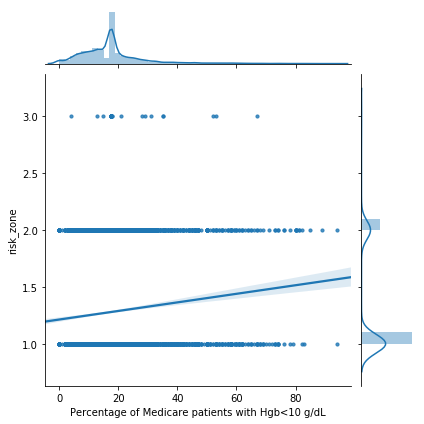

In [165]:
#Create a new dataframe containing only % HGB<10 and risk_zone columns to visualize their co-relations
hgb_vs_risk_zone = df_latest[['Percentage of Medicare patients with Hgb<10 g/dL','risk_zone']]

#Initialize a joint-grid with the dataframe, using seaborn library
hgbGrid = sns.JointGrid(x="Percentage of Medicare patients with Hgb<10 g/dL", y="risk_zone", data=HGB_vs_risk_zone, size=6)

#Draws a regression plot in the grid 
hgbGrid = hgbGrid.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
hgbGrid = hgbGrid.plot_marginals(sns.distplot)